# Airbnb in NYC 2019 Analysis
This project observes a relationship between price and are in nyc, a relationship between price and room type.
This would be useful to consider the best place to stay in nyc that meets visiter's needs. 

In [45]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [46]:
!dir projectdataset

 Volume in drive C is Windows
 Volume Serial Number is B2C5-2109

 Directory of C:\Users\Naruko\Desktop\projectdataset

09/10/2020  04:10 PM    <DIR>          .
09/10/2020  04:10 PM    <DIR>          ..
09/10/2020  03:56 PM         7,077,973 nyc.csv
               1 File(s)      7,077,973 bytes
               2 Dir(s)  35,738,968,064 bytes free


In [47]:
path = 'C:/Users/Naruko/Desktop/projectdataset/nyc.csv'

In [48]:
nyc = pd.read_csv('./projectdataset/nyc.csv')
print(type(nyc))
nyc.head(10)

<class 'pandas.core.frame.DataFrame'>


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [49]:
nyc.shape

(48895, 16)

In [50]:
del nyc['host_id']
del nyc['latitude']
del nyc['longitude']
del nyc['minimum_nights']
del nyc['number_of_reviews']
del nyc['last_review']
del nyc['reviews_per_month']
del nyc['calculated_host_listings_count']
del nyc['availability_365']

In [51]:
nyc.head(15)

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,price
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,200
6,5121,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,Private room,60
7,5178,Large Furnished Room Near B'way,Shunichi,Manhattan,Hell's Kitchen,Private room,79
8,5203,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,Private room,79
9,5238,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Chinatown,Entire home/apt,150


In [165]:
nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# Area and Average Price
Created df including 'neighbourhood group' and 'price' in order to investigate a realtionship between area in nyc and average price.

In [52]:
nyc[['neighbourhood_group', 'price']].head(15)

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80
5,Manhattan,200
6,Brooklyn,60
7,Manhattan,79
8,Manhattan,79
9,Manhattan,150


# Bar Chart. 
From this graph, Manhattan has the highest average price of airbnb, and Brox has the lowerst average price. 

In [175]:
nyc1 = nyc.groupby(nyc.neighbourhood_group).mean().round()
nyc1

,price
neighbourhood_group,
Bronx,87.0
Brooklyn,124.0
Manhattan,197.0
Queens,100.0
Staten Island,115.0


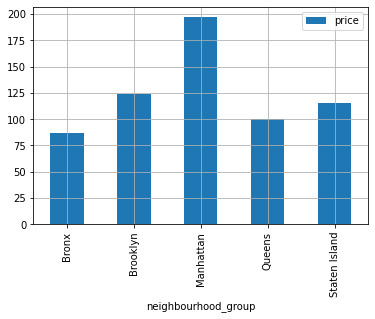

In [56]:
nyc1.plot.bar(grid=True)

# Focus on Manhattan area


Created df includeing neighbourhood_group, neghbourhood, and price
Extract data containing only 'Manhattan'

In [57]:
nyc2= nyc[['neighbourhood_group','neighbourhood', 'price']]
nyc2

,neighbourhood_group,neighbourhood,price
0,Brooklyn,Kensington,149
1,Manhattan,Midtown,225
2,Manhattan,Harlem,150
3,Brooklyn,Clinton Hill,89
4,Manhattan,East Harlem,80
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,70
48891,Brooklyn,Bushwick,40
48892,Manhattan,Harlem,115
48893,Manhattan,Hell's Kitchen,55


In [58]:
nyc3= nyc2[nyc2.neighbourhood_group == 'Manhattan']

In [59]:
nyc3

,neighbourhood_group,neighbourhood,price
1,Manhattan,Midtown,225
2,Manhattan,Harlem,150
4,Manhattan,East Harlem,80
5,Manhattan,Murray Hill,200
7,Manhattan,Hell's Kitchen,79
...,...,...,...
48886,Manhattan,Midtown,200
48888,Manhattan,Hell's Kitchen,125
48892,Manhattan,Harlem,115
48893,Manhattan,Hell's Kitchen,55


# Created df that shows town in Manhattan and its average price


In [60]:
nycman = nyc3.groupby('neighbourhood').mean().round()
nycman

,price
neighbourhood,
Battery Park City,368.0
Chelsea,250.0
Chinatown,161.0
Civic Center,192.0
East Harlem,133.0
East Village,186.0
Financial District,225.0
Flatiron District,342.0
Gramercy,223.0


In [61]:
nycman['price'].describe()

count     32.000000
mean     212.281250
std       87.881237
min       89.000000
25%      154.000000
50%      208.000000
75%      253.250000
max      491.000000
Name: price, dtype: float64

# Df 1 : the average price <= 200 


In this graph (less than $200), the mean in Civic Center is highest, Lower East Side, Marble Hill, Washington Heights are lowest. 

In [68]:
nycman1= nycman.query('price <= 200')
nycman1

,price
neighbourhood,
Chinatown,161.0
Civic Center,192.0
East Harlem,133.0
East Village,186.0
Harlem,119.0
Inwood,89.0
Lower East Side,186.0
Marble Hill,89.0
Morningside Heights,115.0


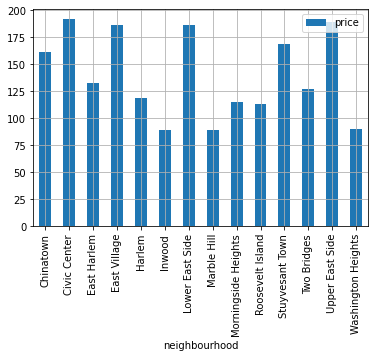

In [70]:
nycman1.plot.bar(grid=True)

# Df 2 : the average price >= 200
In this graph(higher than $200), Tribeca is higherst, Kips Bay is lowerst.

In [69]:
nycman2= nycman.query('price >= 200')
nycman2

,price
neighbourhood,
Battery Park City,368.0
Chelsea,250.0
Financial District,225.0
Flatiron District,342.0
Gramercy,223.0
Greenwich Village,263.0
Hell's Kitchen,205.0
Kips Bay,202.0
Little Italy,222.0


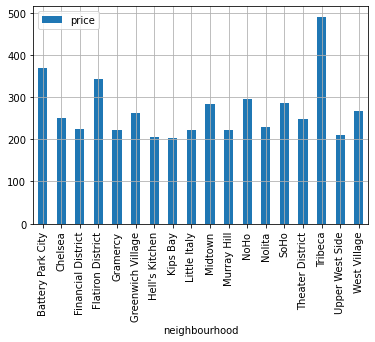

In [71]:
nycman2.plot.bar(grid=True)

# Focus on one of lowest average price town, Inwood in Manhattan 
The result is that there are many private rooms in Inwood and this is the cheapest type. 
Entire home/apt has the highest price in Inwood.
The lowest price is $22
The highest price is $359

If you rent in Inwood, Private room is the popular type and cheap. 

In [122]:
nycroom = nyc[['room_type','price','neighbourhood']]
nycroom1= nycroom[nycroom.neighbourhood == 'Inwood']
nycroom1

,room_type,price,neighbourhood
26,Private room,80,Inwood
28,Private room,44,Inwood
265,Private room,75,Inwood
302,Private room,90,Inwood
644,Private room,71,Inwood
...,...,...,...
47242,Private room,59,Inwood
47482,Private room,50,Inwood
47636,Private room,100,Inwood
48515,Entire home/apt,349,Inwood


In [170]:
nycroom1['price'].describe()

count    252.000000
mean      88.896825
std       53.232083
min       22.000000
25%       52.000000
50%       77.500000
75%      100.000000
max      359.000000
Name: price, dtype: float64

In [155]:
df = pd.DataFrame(nycroom1, columns=['room_type'])
dups_room = nycroom1.pivot_table(index=['room_type'], aggfunc='size')
dups_room

room_type
Entire home/apt    103
Private room       145
Shared room          4
dtype: int64

In [156]:
nycinw= nycroom1.groupby('room_type').mean().round()
nycinw

,price
room_type,
Entire home/apt,118.0
Private room,68.0
Shared room,115.0


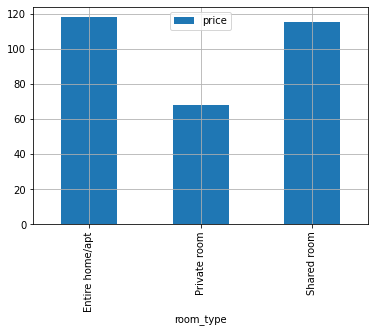

In [157]:
nycinw.plot.bar(grid=True)

# Focus on one of the highest average price town, Tribeca in Manhattan
The result is that there are many Entire home/apt in this area, and less private room type. 
the highest price is $8500
The lowest price is $60

The price average of Entire home/apt is higher than Private room.
If you wanna rent considering price, Private room type is better, however, if you prefer bigger room, Entire home/apt type is good. 

In [158]:
nycroom = nyc[['room_type','price','neighbourhood']]
nycroom2= nycroom[nycroom.neighbourhood == 'Tribeca']
nycroom2

,room_type,price,neighbourhood
587,Private room,150,Tribeca
1111,Entire home/apt,500,Tribeca
1345,Private room,229,Tribeca
1386,Entire home/apt,130,Tribeca
1627,Entire home/apt,210,Tribeca
...,...,...,...
48519,Entire home/apt,169,Tribeca
48564,Entire home/apt,269,Tribeca
48566,Entire home/apt,314,Tribeca
48635,Entire home/apt,349,Tribeca


In [169]:
nycroom2['price'].describe()

count     177.000000
mean      490.638418
std       856.341720
min        60.000000
25%       200.000000
50%       295.000000
75%       485.000000
max      8500.000000
Name: price, dtype: float64

In [160]:
df = pd.DataFrame(nycroom2, columns=['room_type'])
dups_room1 = nycroom2.pivot_table(index=['room_type'], aggfunc='size')
dups_room1

room_type
Entire home/apt    143
Private room        34
dtype: int64

In [161]:
nyctri= nycroom2.groupby('room_type').mean().round()
nyctri

,price
room_type,
Entire home/apt,562.0
Private room,191.0


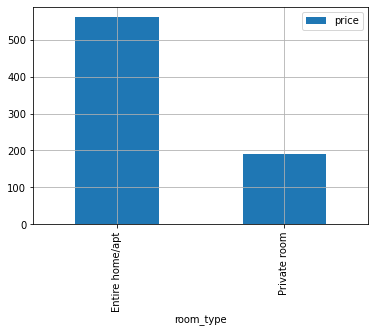

In [171]:
nyctri.plot.bar(grid=True)